# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [89]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | kloulklubed
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | chalette-sur-loing
Processing Record 7 of Set 1 | longjiang
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | holualoa
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | kostomuksha
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | bikenibeu village
Processing Record 20 of Set 1 | lucea
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | edinburgh o

In [91]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [92]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,6.97,43,40,3.60,US,1682643083
1,kloulklubed,7.0419,134.2556,29.28,75,95,1.90,PW,1682643872
2,dudinka,69.4058,86.1778,-14.74,100,100,0.84,RU,1682643411
3,grytviken,-54.2811,-36.5092,1.35,82,17,3.62,GS,1682643375
4,banda aceh,5.5577,95.3222,27.41,76,100,1.61,ID,1682643872


In [93]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,6.97,43,40,3.60,US,1682643083
1,kloulklubed,7.0419,134.2556,29.28,75,95,1.90,PW,1682643872
2,dudinka,69.4058,86.1778,-14.74,100,100,0.84,RU,1682643411
3,grytviken,-54.2811,-36.5092,1.35,82,17,3.62,GS,1682643375
4,banda aceh,5.5577,95.3222,27.41,76,100,1.61,ID,1682643872


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

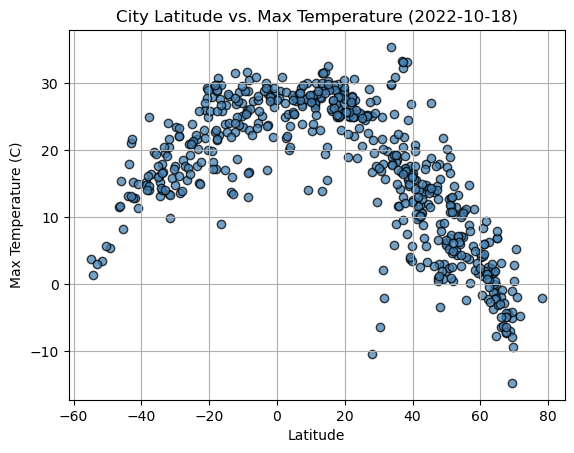

In [95]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c='steelblue', alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

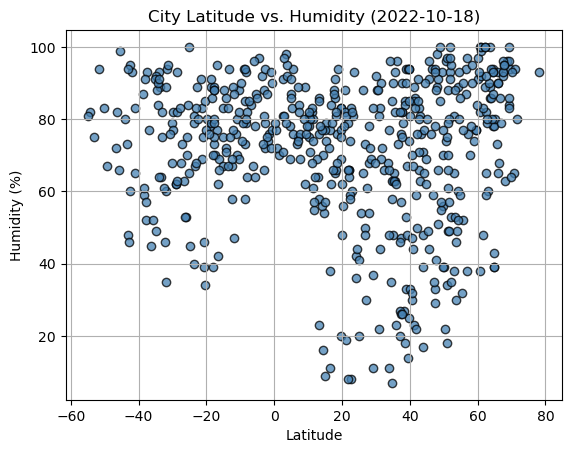

In [96]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c='steelblue', alpha=0.75, edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

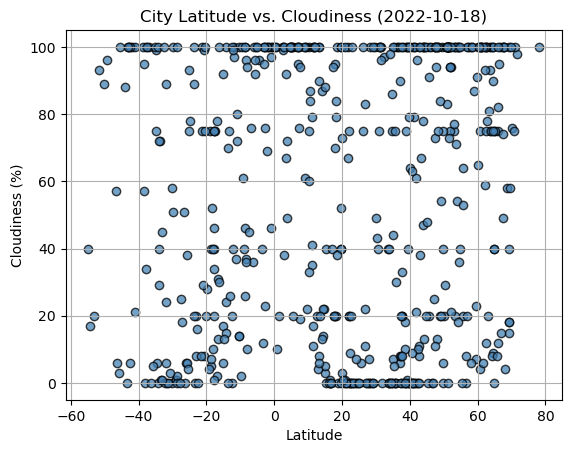

In [97]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c='steelblue', alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

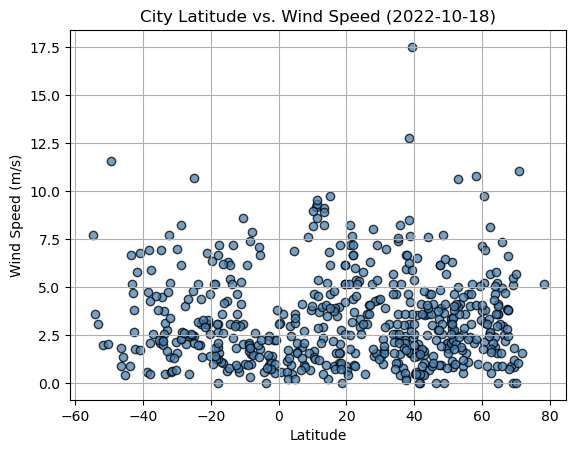

In [98]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c='steelblue', alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
def line_regress_func():
    x = np.array(x_data)
    y = np.array(y_data)

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print(f"The r-value is: {r_value}")

    plt.plot(x,slope*x+intercept,color="red")
    plt.text(int(x.min())+1, int(y.min())+5, f"y = {round(slope, 2)}x + {round(intercept, 2)}")
    plt.show()

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,6.97,43,40,3.60,US,1682643083
1,kloulklubed,7.0419,134.2556,29.28,75,95,1.90,PW,1682643872
2,dudinka,69.4058,86.1778,-14.74,100,100,0.84,RU,1682643411
4,banda aceh,5.5577,95.3222,27.41,76,100,1.61,ID,1682643872
5,chalette-sur-loing,48.0134,2.7359,15.68,98,100,3.91,FR,1682643873


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,1.35,82,17,3.62,GS,1682643375
8,puerto natales,-51.7236,-72.4875,3.49,94,93,2.00,CL,1682643873
9,port-aux-francais,-49.3500,70.2167,5.46,67,96,11.60,TF,1682643874
10,ushuaia,-54.8000,-68.3000,3.81,81,40,7.72,AR,1682643875
16,adamstown,-25.0660,-130.1015,23.93,65,93,2.45,PN,1682643357


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8538798460879965


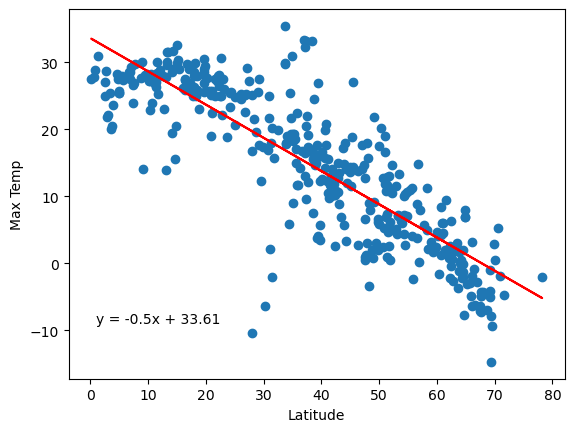

In [102]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
line_regress_func()

The r-value is: 0.7429121983681989


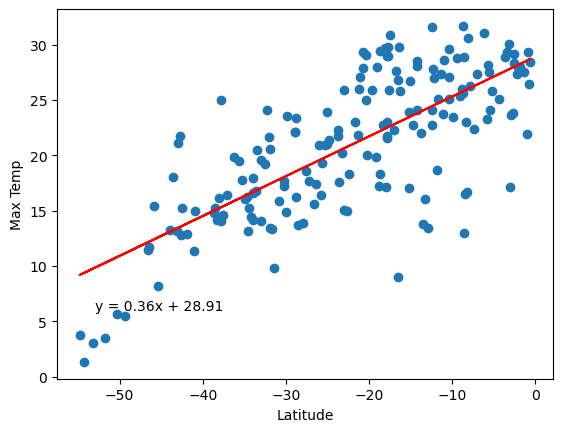

In [103]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
line_regress_func()

**Discussion about the linear relationship:** 
In the northern hemisphere dataset, latitudes that are very positive have a low temperature and the temperature increases as latitude approaches zero (a very strong negative association).
In the southern hemisphere dataset, latitudes that are very negative have a low temperature and the temperature increases as latitude approaches zero (a strong negative association).
This means that there is a negative correlation between distance from the equator and maximum temperature of a location.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11715738640705052


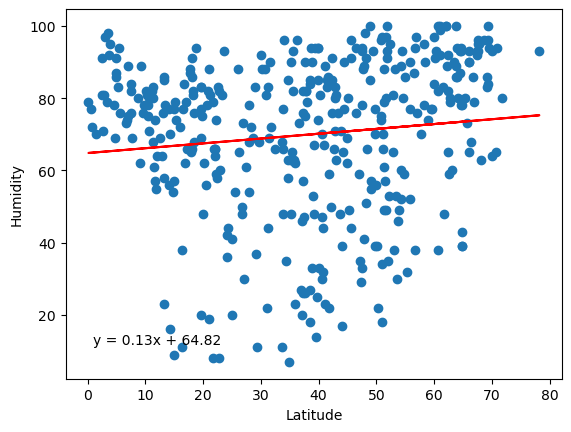

In [104]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.ylabel("Humidity")
plt.xlabel("Latitude")
line_regress_func()

The r-value is: 0.10852579184472645


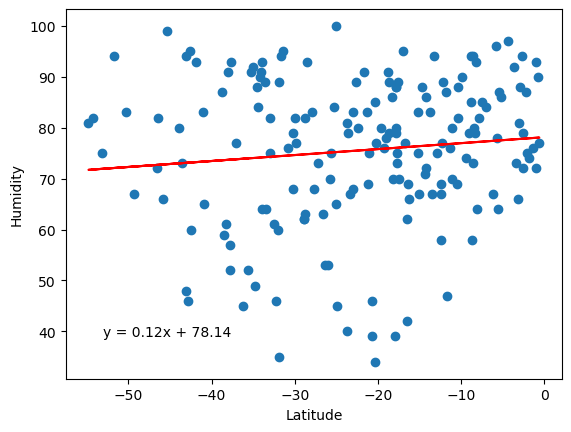

In [105]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.ylabel("Humidity")
plt.xlabel("Latitude")
line_regress_func()

**Discussion about the linear relationship:** 
In the northern hemisphere dataset, latitudes that are very positive have somewhat higher humidity than latitudes closer to zero (very weak positive or no correlation).
In the southern hemisphere dataset, latitudes that are very negative have somewhat lower humidity than latitudes closer to zero (very weak positive or no correlation).
This means that there may or may not be a very weak correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12672945524590223


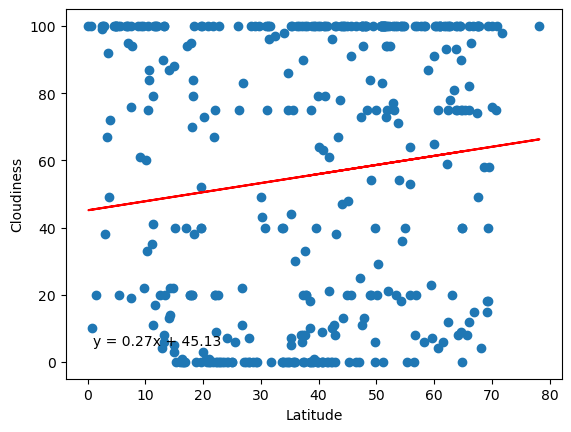

In [110]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
line_regress_func()

The r-value is: 0.1338224561465506


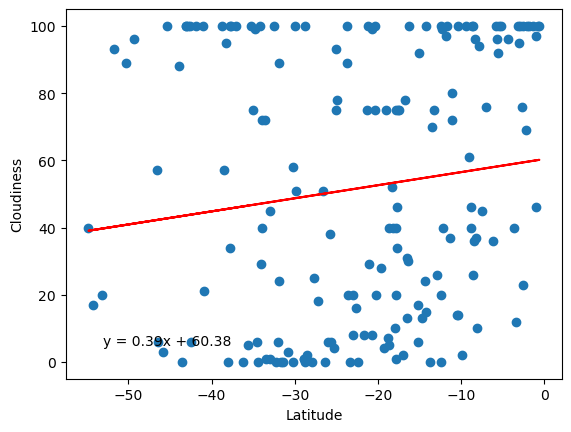

In [111]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
line_regress_func()

**Discussion about the linear relationship:** 
In the northern hemisphere dataset, latitudes that are very positive have somewhat higher cloudiness than latitudes closer to zero (very weak positive or no correlation).
In the southern hemisphere dataset, latitudes that are very negative have somewhat lower cloudiness than latitudes closer to zero (very weak positive or no correlation).
This means that there may or may not be a very weak correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.02198851297923511


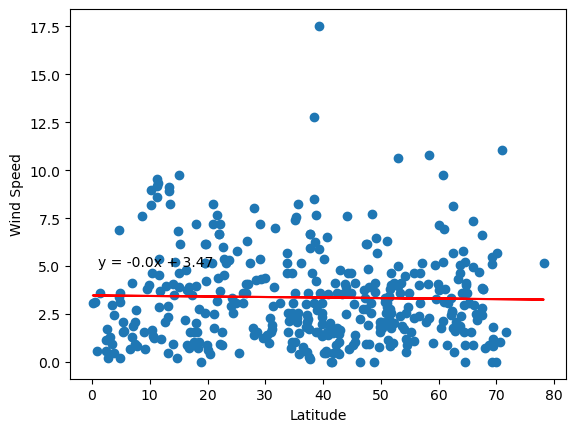

In [112]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
line_regress_func()

The r-value is: -0.17750541398110992


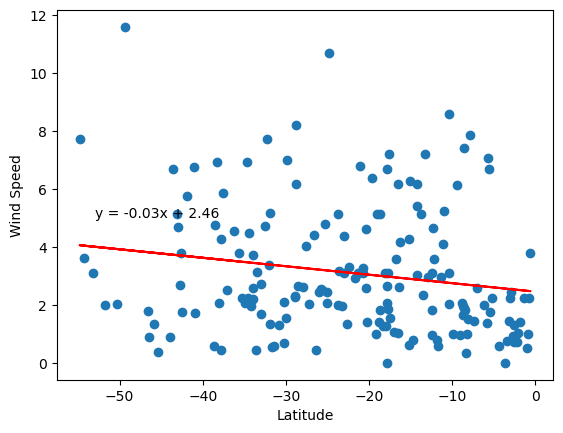

In [113]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
line_regress_func()

**Discussion about the linear relationship:** 
In the northern hemisphere dataset, latitudes that are very positive have somewhat lower wind speed than latitudes closer to zero (very weak positive or no correlation).
In the southern hemisphere dataset, latitudes that are very negative have somewhat higher wind speed than latitudes closer to zero (very weak positive or no correlation).
This means that there may or may not be a very weak correlation between latitude and wind speed.